# Predicting people's desire to have kids with dating app data

In this project I am using data collected from questions people answer on a dating app. The data is from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/okcupid-profiles).

The dataset has a `offspring` column, that contains information about people's current kids and the desire of having kids or not. I am going to use this column to make labels for the available data, and then I am going to build a classifier to see it if it's possible to predict this information from the other columns in the dataset.

The project is divided in the following sections:
- **Exploratory data analysis**: look at data distribution, clean data, make new features
- **Feature selection methods**:
    - Filter methods: mutual information
    - Wrapper methods: forward/backward features selection, recursive feature elimination
    - PCA dimensionality reduction
- **Build model**: try different classifiers to see which one performs best with different sets of features
- **Conclusions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('/kaggle/input/profiles-dating-app/profiles.csv')
print(df.shape)
df.head()

(59946, 31)


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [4]:
# percentage of missing data per column
(df.isna().sum() / df.shape[0])*100

age             0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
orientation     0.000000
pets           33.231575
religion       33.740366
sex             0.000000
sign           18.443266
smokes          9.194942
speaks          0.083408
status          0.000000
dtype: float64

In [5]:
# drop rows with missing values in want_kids column
df = df.dropna(subset=['offspring'])
df.shape

(24385, 31)

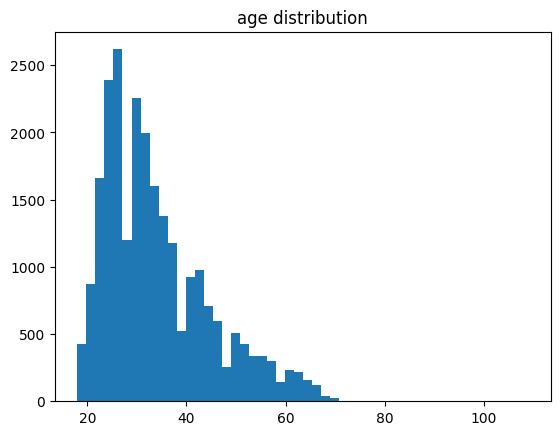

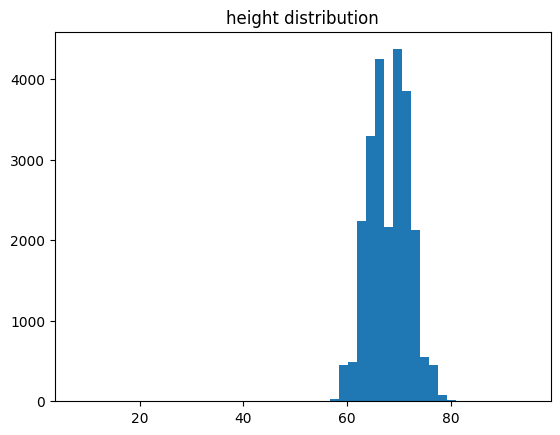

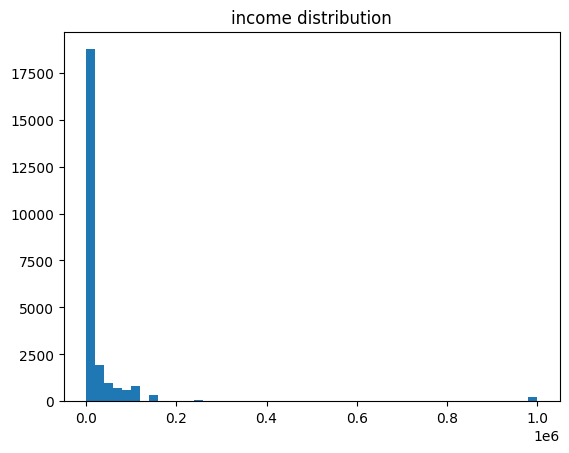

In [6]:
## plot numerical features
int_columns = ['age', 'height', 'income']
for i, col in enumerate(int_columns):
    plt.figure(i)
    plt.hist(df[col], bins=50)
    plt.title(col + ' distribution')
    plt.show

In [7]:
# check how many outliers in income
df[df.income > 800000].income.count()

202

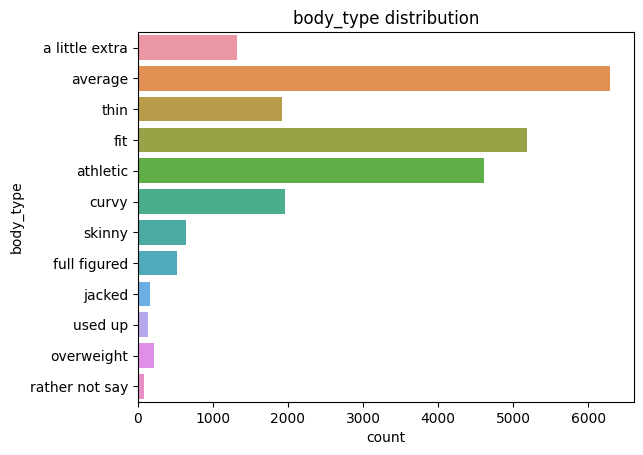

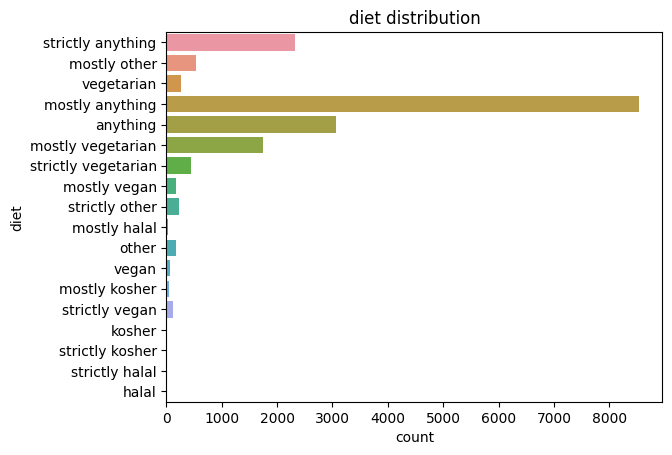

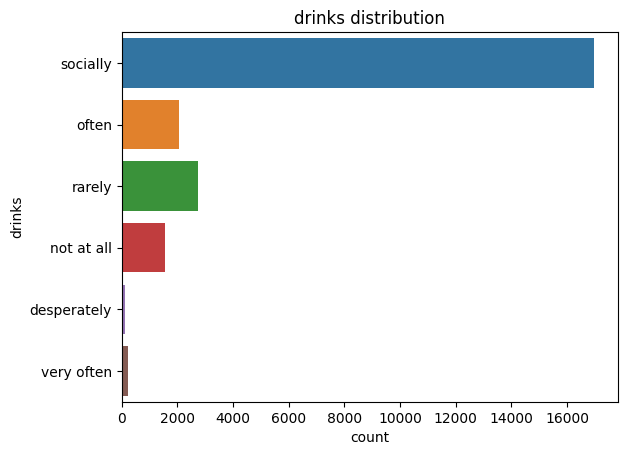

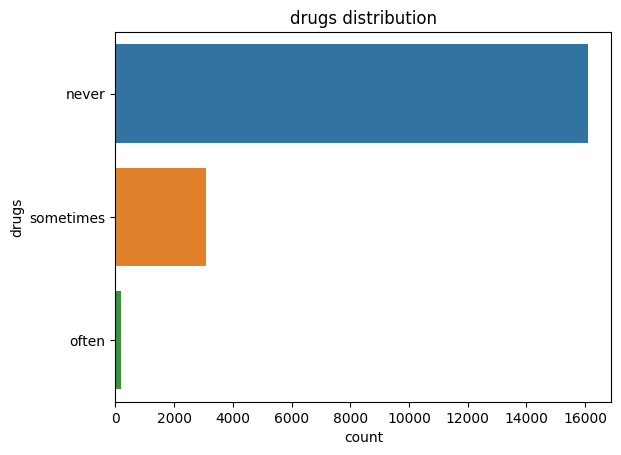

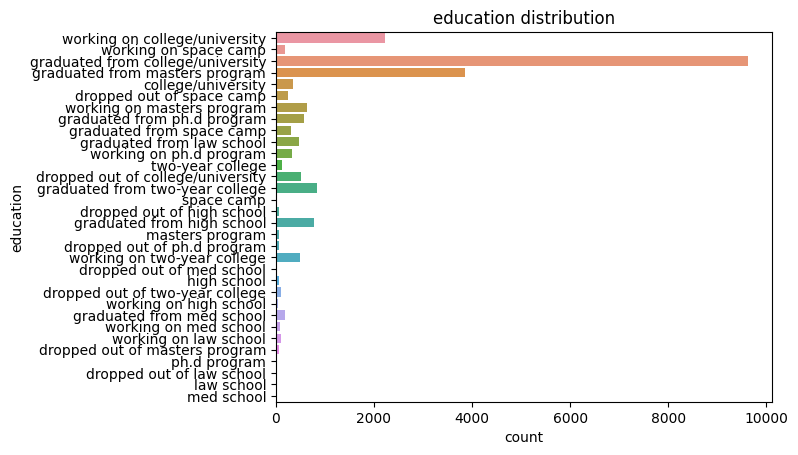

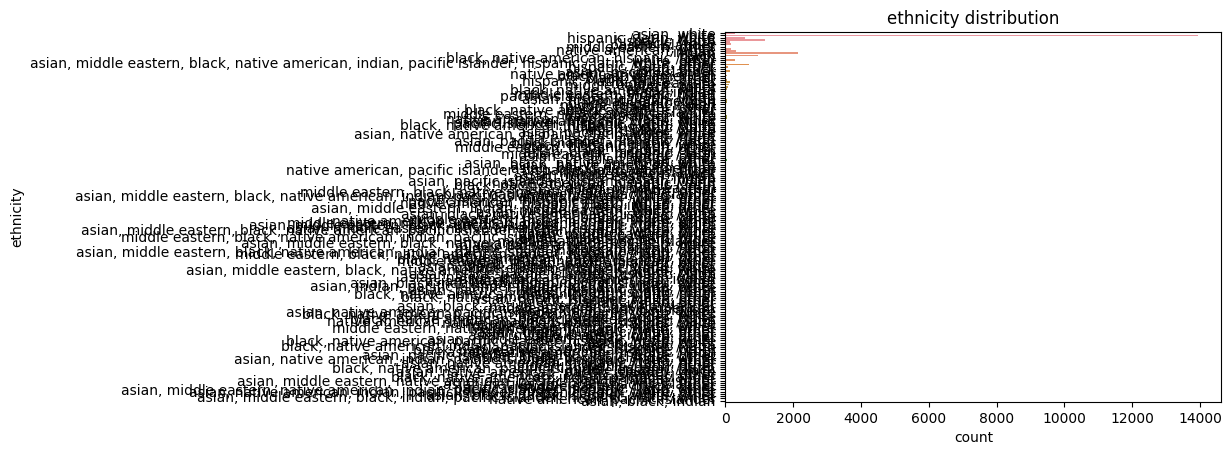

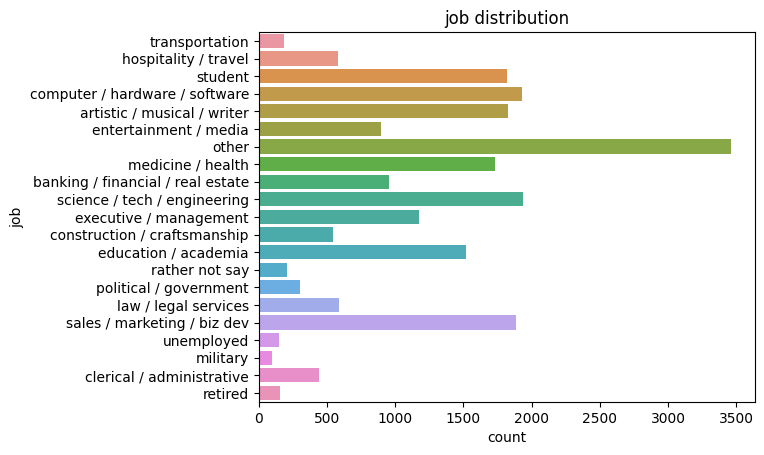

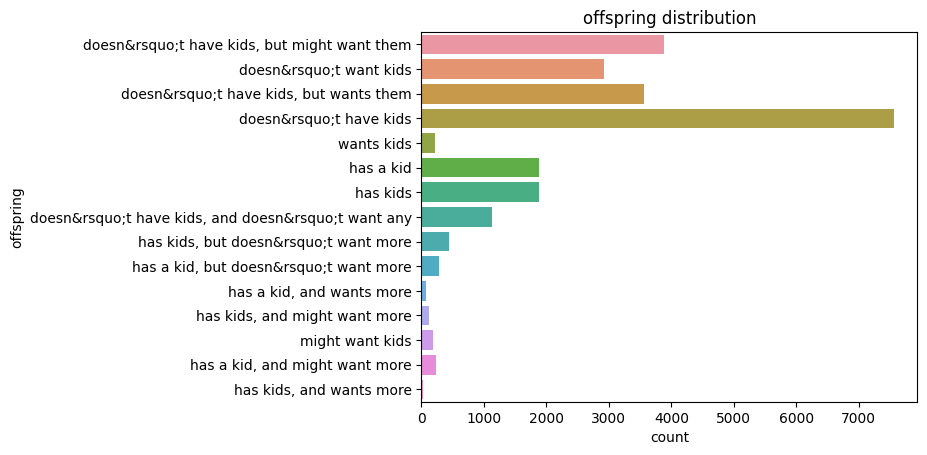

In [8]:
# plot categorical features
cat_columns = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity','job', 'offspring',]
for i, col in enumerate(cat_columns):
    plt.figure(i)
    sns.countplot(data=df, y=df[col])
    plt.title(col + ' distribution')
    plt.show

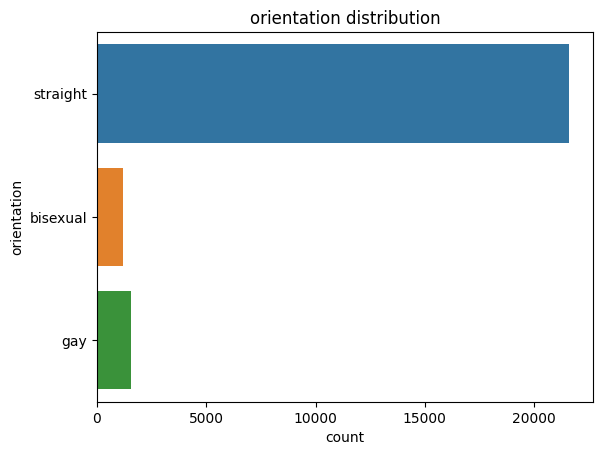

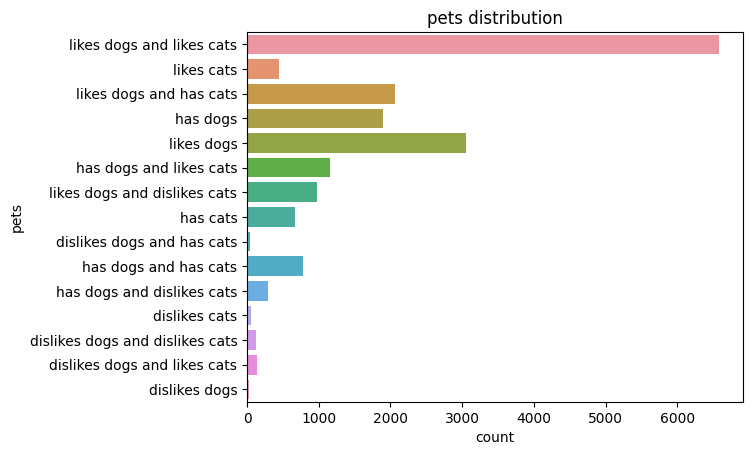

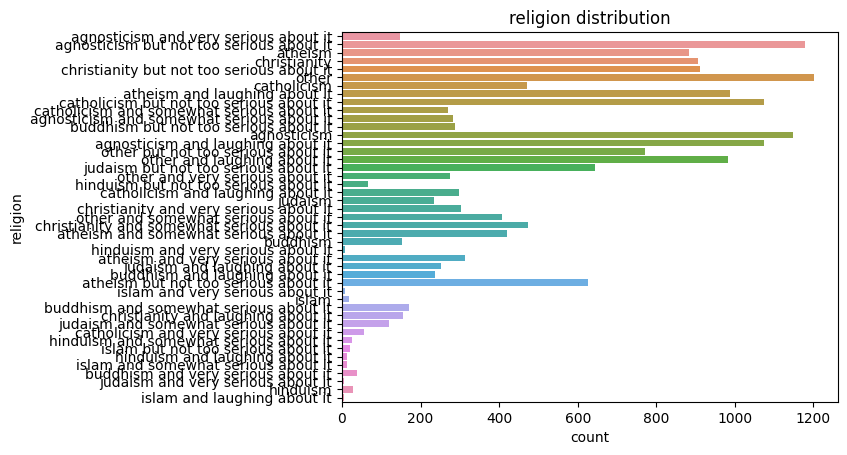

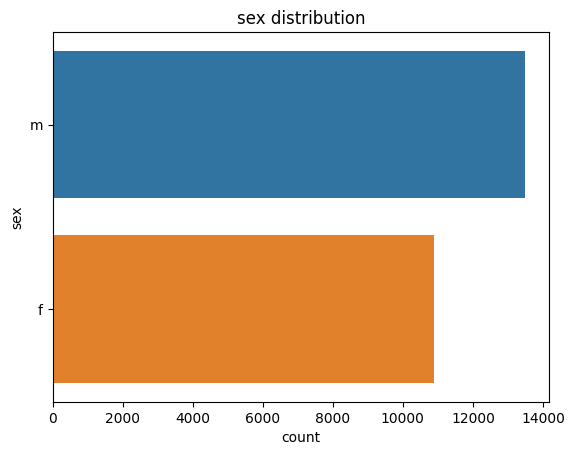

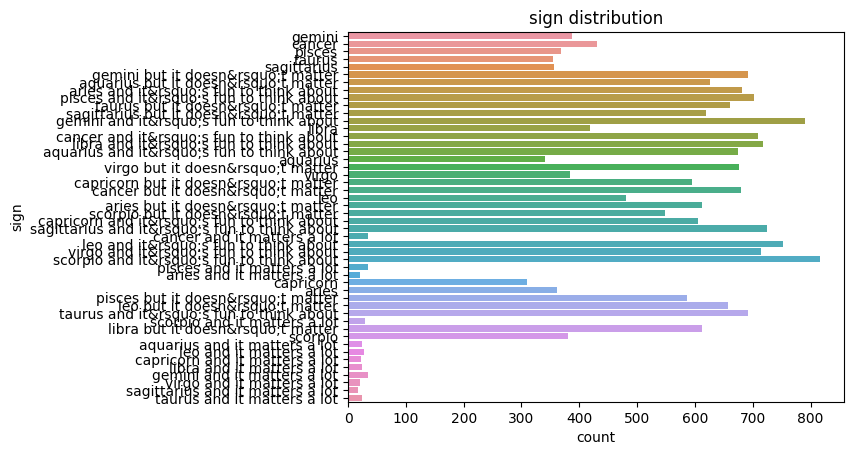

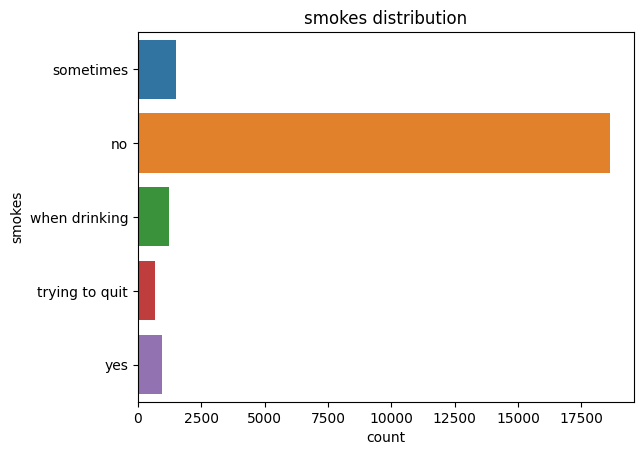

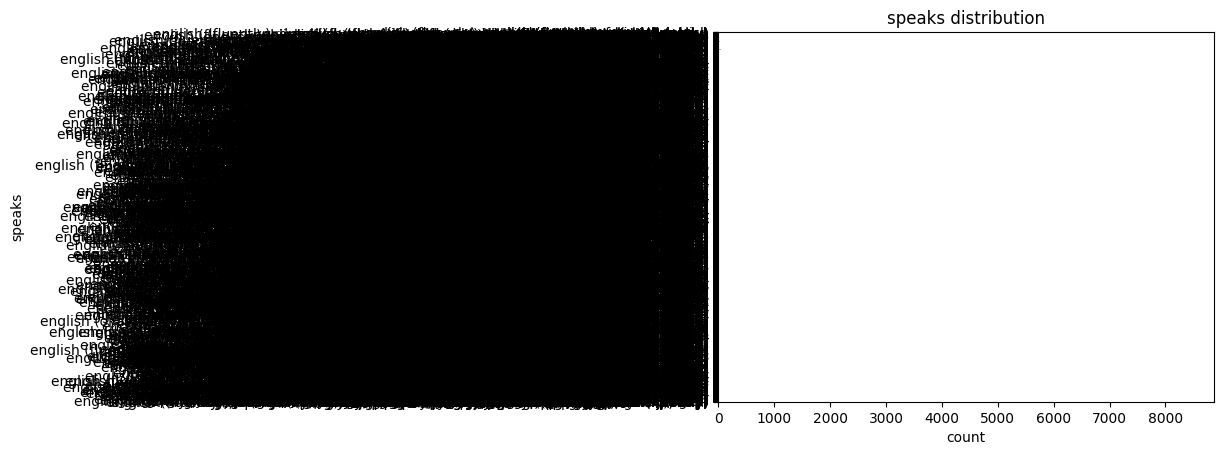

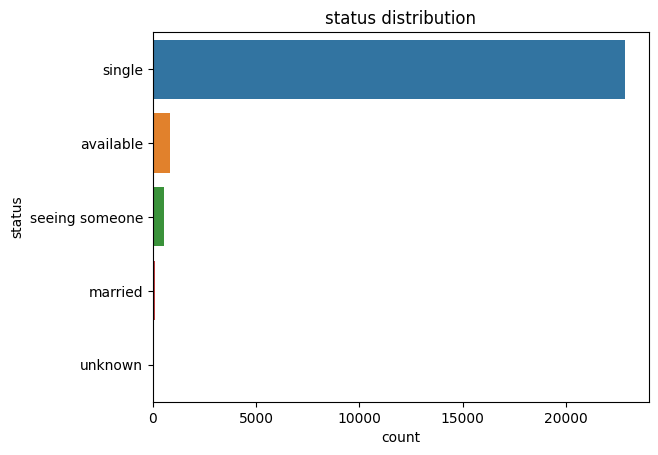

In [9]:
cat_columns = ['orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
for i, col in enumerate(cat_columns):
    plt.figure(i)
    sns.countplot(data=df, y=df[col])
    plt.title(col + ' distribution')
    plt.show

In [10]:
df.ethnicity.value_counts()[:20]

ethnicity
white                      13933
asian                       2128
hispanic / latin            1167
black                        971
other                        705
hispanic / latin, white      570
indian                       323
asian, white                 295
white, other                 294
native american, white       164
pacific islander             159
black, white                 138
asian, pacific islander      124
middle eastern               122
middle eastern, white        106
hispanic / latin, other       71
black, other                  64
black, hispanic / latin       58
black, native american        55
pacific islander, white       54
Name: count, dtype: int64

In [11]:
# drop columns that are not helpful to predict the desire to have kids
df = df.drop(columns=['diet', 'last_online', 'location', 'speaks', 'sign', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9'])
df.head()

,age,body_type,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,smokes,status
0,22,a little extra,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,sometimes,single
1,35,average,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,no,single
3,23,thin,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,no,single
5,29,average,socially,NaN,graduated from college/university,white,67.0,-1,computer / hardware / software,"doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,no,single
7,31,average,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,"doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,f,no,single


In [12]:
# check income column because it looks like there are incomes -1
df[df.income == -1].income.count()

18773

In [13]:
# looks like all income data is -1, let's drop the column
df = df.drop(columns=['income'])

## Clean columns with too many categories

In [14]:
# fix categorical column ethnicity
df['first_ethnicity'] = df.ethnicity.str.split().str[0]
df['first_ethnicity'] = df['first_ethnicity'].str.strip(',')
df.apply(lambda x: x.replace({'native':'nat_american', 'middle':'middle_eastern', 'pacific':'pacific_islander'}, regex=True))
df.first_ethnicity.value_counts()

first_ethnicity
white       14227
asian        2885
hispanic     1859
black        1476
other         705
indian        367
native        343
middle        313
pacific       271
Name: count, dtype: int64

In [15]:
# Define a function to assign values based on conditions
def assign_education(education):
    if 'dropped out' in str(education):
        return 'dropped out'
    elif 'college' in str(education):
        return 'college'
    elif 'masters' in str(education):
        return 'master'
    elif 'high school' in str(education):
        return 'high school'
    elif 'ph.d' in str(education):
        return 'phd'
    elif 'law school' in str(education):
        return 'law school'
    elif 'med school' in str(education):
        return 'med school'
    elif 'space camp' in str(education):
        return 'space camp'
    else:
        return None 

# Assuming df is your DataFrame
df['education_binned'] = df['education'].apply(assign_education)
df.education_binned.value_counts()

education_binned
college        13658
master          4552
dropped out     1053
phd              910
high school      876
law school       589
space camp       524
med school       259
Name: count, dtype: int64

In [16]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

In [17]:
# Define a mapping dictionary for 'offspring' values
offspring_mapping = {
    "doesn&rsquo;t have kids": (0, None),
    "doesn&rsquo;t have kids, but might want them": (0, 1),
    "doesn&rsquo;t have kids, but wants them": (0, 1),
    "has kids": (1, None),
    "has a kid": (1, None),
    "doesn&rsquo;t have kids, and doesn&rsquo;t want any": (0, 0),
    "has kids, but doesn&rsquo;t want more": (1, 0),
    "has a kid, and might want more": (1, 1),
    "wants kids": (0, 1),
    "might want kids": (0, 1),
    "has kids, and might want more": (1, 1),
    "has a kid, and wants more": (1, 1),
}

# Apply the dictionary to create two new columns
df[['kids', 'want_kids']] = df['offspring'].map(offspring_mapping).apply(pd.Series)

In [18]:
df.kids.value_counts()

kids
0.0    16539
1.0     4623
Name: count, dtype: int64

In [19]:
# bin pets column
df.pets.value_counts()

pets
likes dogs and likes cats          6586
likes dogs                         3057
likes dogs and has cats            2062
has dogs                           1891
has dogs and likes cats            1155
likes dogs and dislikes cats        980
has dogs and has cats               778
has cats                            675
likes cats                          445
has dogs and dislikes cats          295
dislikes dogs and likes cats        136
dislikes dogs and dislikes cats     124
dislikes cats                        61
dislikes dogs and has cats           45
dislikes dogs                        28
Name: count, dtype: int64

In [20]:
# Define a mapping dictionary for 'pets' values
pets_mapping = {
    "likes dogs and likes cats": (1, 0),
    "likes dogs": (1, 0),
    "likes dogs and has cats": (1, 1),
    "has dogs": (1, 1),
    "has dogs and likes cats": (1, 1),
    "likes dogs and dislikes cats": (1, 0),
    "has dogs and has cats": (1, 1),
    "has cats": (1, 1),
    "likes cats": (1, 1),
    "has dogs and dislikes cats": (1, 1),
    "dislikes dogs and likes cats": (1, 0),
    "dislikes dogs and dislikes cats": (0, 0),
    "dislikes cats":(0, 0),
    "dislikes dogs and has cats":(1, 1), 
    "dislikes dogs":(0, 0)
}

# Apply the dictionary to create two new columns
df[['likes_pets', 'has_pets']] = df['pets'].map(pets_mapping).apply(pd.Series)# check how many religions there are in religion column
df.religion.value_counts()

religion
other                                         1202
agnosticism but not too serious about it      1179
agnosticism                                   1149
agnosticism and laughing about it             1075
catholicism but not too serious about it      1073
atheism and laughing about it                  988
other and laughing about it                    982
christianity but not too serious about it      910
christianity                                   907
atheism                                        884
other but not too serious about it             771
judaism but not too serious about it           643
atheism but not too serious about it           626
christianity and somewhat serious about it     474
catholicism                                    470
atheism and somewhat serious about it          419
other and somewhat serious about it            408
atheism and very serious about it              312
christianity and very serious about it         303
catholicism and laughi

In [21]:
# check how many religions there are in religion column
df.religion.value_counts()

religion
other                                         1202
agnosticism but not too serious about it      1179
agnosticism                                   1149
agnosticism and laughing about it             1075
catholicism but not too serious about it      1073
atheism and laughing about it                  988
other and laughing about it                    982
christianity but not too serious about it      910
christianity                                   907
atheism                                        884
other but not too serious about it             771
judaism but not too serious about it           643
atheism but not too serious about it           626
christianity and somewhat serious about it     474
catholicism                                    470
atheism and somewhat serious about it          419
other and somewhat serious about it            408
atheism and very serious about it              312
christianity and very serious about it         303
catholicism and laughi

In [22]:
# create new column about religion to group religions in a better way
df['religion_binned'] = df.religion.str.split().str[0]
df.religion_binned.value_counts()

religion_binned
agnosticism     3834
other           3637
atheism         3229
christianity    2749
catholicism     2168
judaism         1253
buddhism         888
hinduism         141
islam             64
Name: count, dtype: int64

In [23]:
# Define a function to assign values based on conditions
def assign_religion_value(religion):
    if 'somewhat serious' in str(religion):
        return 1
    elif 'not too serious' in str(religion):
        return 0
    elif 'laughing' in str(religion):
        return 0
    elif 'very serious' in str(religion):
        return 1
    else:
        return None 

# Assuming df is your DataFrame
df['religion_serious'] = df['religion'].apply(assign_religion_value)

# check if it worked
df.groupby(['religion', 'religion_serious']).count().head()

,,age,body_type,drinks,drugs,education,ethnicity,height,job,offspring,orientation,...,sex,smokes,status,first_ethnicity,education_binned,kids,want_kids,likes_pets,has_pets,religion_binned
religion,religion_serious,,,,,,,,,,,,,,,,,,,,,
agnosticism and laughing about it,0.0,1075,1023,1058,826,1022,997,1075,1021,1075,1075,...,1075,1028,1075,997,1022,882,451,910,910,1075
agnosticism and somewhat serious about it,1.0,282,270,280,220,272,261,282,267,282,282,...,282,274,282,261,272,224,138,249,249,282
agnosticism and very serious about it,1.0,149,141,147,109,140,137,149,137,149,149,...,149,144,149,137,140,117,66,121,121,149
agnosticism but not too serious about it,0.0,1179,1120,1164,934,1138,1120,1179,1119,1179,1179,...,1179,1134,1179,1120,1138,1010,535,992,992,1179
atheism and laughing about it,0.0,988,933,968,745,926,909,988,926,988,988,...,988,937,988,909,926,764,408,831,831,988


In [24]:
df.columns

Index(['age', 'body_type', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'job', 'offspring', 'orientation', 'pets', 'religion', 'sex',
       'smokes', 'status', 'first_ethnicity', 'education_binned', 'kids',
       'want_kids', 'likes_pets', 'has_pets', 'religion_binned',
       'religion_serious'],
      dtype='object')

## Deal with missing values

In [25]:
# create X and check for missing values and categorical features
X = df[['age', 'body_type', 'drinks', 'drugs','height', 'job', 'orientation','sex',
       'smokes', 'status', 'first_ethnicity', 'education_binned', 'kids',
       'want_kids', 'likes_pets', 'has_pets', 'religion_binned', 'religion_serious']]
X.head()

,age,body_type,drinks,drugs,height,job,orientation,sex,smokes,status,first_ethnicity,education_binned,kids,want_kids,likes_pets,has_pets,religion_binned,religion_serious
0,22,a little extra,socially,never,75.0,transportation,straight,m,sometimes,single,asian,college,0.0,1.0,1.0,0.0,agnosticism,1.0
1,35,average,often,sometimes,70.0,hospitality / travel,straight,m,no,single,white,space camp,0.0,1.0,1.0,0.0,agnosticism,0.0
3,23,thin,socially,NaN,71.0,student,straight,m,no,single,white,college,NaN,NaN,1.0,1.0,NaN,NaN
5,29,average,socially,NaN,67.0,computer / hardware / software,straight,m,no,single,white,college,0.0,1.0,1.0,1.0,atheism,NaN
7,31,average,socially,never,65.0,artistic / musical / writer,straight,f,no,single,white,college,0.0,1.0,1.0,0.0,christianity,NaN


In [26]:
(X.isna().sum() / X.shape[0])*100

age                  0.000000
body_type            5.458274
drinks               2.718885
drugs               20.512610
height               0.004101
job                  8.193562
orientation          0.000000
sex                  0.000000
smokes               5.704326
status               0.000000
first_ethnicity      7.951610
education_binned     8.054132
kids                13.217142
want_kids           59.655526
likes_pets          24.880049
has_pets            24.880049
religion_binned     26.335862
religion_serious    47.016609
dtype: float64

In [27]:
X = X.dropna(subset=['want_kids'])
X.shape

(9838, 18)

In [28]:
(X.isna().sum() / X.shape[0])*100

age                  0.000000
body_type            3.608457
drinks               2.114251
drugs               18.824964
height               0.000000
job                  6.444399
orientation          0.000000
sex                  0.000000
smokes               4.777394
status               0.000000
first_ethnicity      7.227079
education_binned     6.251271
kids                 0.000000
want_kids            0.000000
likes_pets          19.068916
has_pets            19.068916
religion_binned     23.622688
religion_serious    41.858101
dtype: float64

In [29]:
X.likes_pets.value_counts()

likes_pets
1.0    7871
0.0      91
Name: count, dtype: int64

In [30]:
# Interpolate missing values in likes_pets column by using percentage of actual values in column
# Calculate the percentage of 0s and 1s in the existing data
percent_0s = (X['likes_pets'] == 0).sum() / (7871+91)
percent_1s = (X['likes_pets'] == 1).sum() / (7871+91)

# Interpolate missing values based on their percentages
def interpolate_missing(row):
    if pd.isna(row['likes_pets']):
        rand_value = np.random.choice([0, 1], p=[percent_0s, percent_1s])
        return rand_value
    else:
        return row['likes_pets']

X['likes_pets'] = X.apply(interpolate_missing, axis=1)
X.likes_pets.value_counts()

likes_pets
1.0    9734
0.0     104
Name: count, dtype: int64

In [31]:
# fill missing values
X.drugs = X.drugs.fillna('not say')                # I'm assuming that people that didn't answer do not want to say
X.has_pets = X.has_pets.fillna(0)                  # I'm assuming that people that didn't answer do not own pets
X.religion_serious = X.religion_serious.fillna(0)  # I'm assuming that people that didn't answer are not serious about their religion
X.religion_binned = X.religion_binned.fillna('not say')   # I'm assuming that people that didn't answer do not want to say

# fill column with few missig values with the most frequent category
X.body_type = X.body_type.fillna(X.body_type.mode().to_string(index=False))
X.drinks = X.drinks.fillna(X.drinks.mode().to_string(index=False))
X.drugs = X.drugs.fillna(X.drugs.mode().to_string(index=False))
X.job = X.job.fillna(X.job.mode().to_string(index=False))
X.smokes = X.smokes.fillna(X.smokes.mode().to_string(index=False))
X.first_ethnicity = X.first_ethnicity.fillna(X.first_ethnicity.mode().to_string(index=False))
X.education_binned = X.education_binned.fillna(X.education_binned.mode().to_string(index=False))
X.isna().sum()

age                 0
body_type           0
drinks              0
drugs               0
height              0
job                 0
orientation         0
sex                 0
smokes              0
status              0
first_ethnicity     0
education_binned    0
kids                0
want_kids           0
likes_pets          0
has_pets            0
religion_binned     0
religion_serious    0
dtype: int64

In [32]:
# create actual X and y
y = X['want_kids']
X = X.drop(columns=['want_kids'])

# Feature selection techniques

In [33]:
X.dtypes

age                   int64
body_type            object
drinks               object
drugs                object
height              float64
job                  object
orientation          object
sex                  object
smokes               object
status               object
first_ethnicity      object
education_binned     object
kids                float64
likes_pets          float64
has_pets            float64
religion_binned      object
religion_serious    float64
dtype: object

In [34]:
# Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder

object_columns = X.select_dtypes(include=['object']).columns   #select columns with 'object' type
encoder = LabelEncoder()
X_enc = X.copy()

for column in object_columns:
    X_enc[column] = encoder.fit_transform(X[column])


X_enc.head()

,age,body_type,drinks,drugs,height,job,orientation,sex,smokes,status,first_ethnicity,education_binned,kids,likes_pets,has_pets,religion_binned,religion_serious
0,22,0,4,0,75.0,19,2,1,1,3,0,0,0.0,1.0,0.0,0,1.0
1,35,2,2,3,70.0,8,2,1,0,3,8,7,0.0,1.0,0.0,0,0.0
5,29,2,4,1,67.0,3,2,1,0,3,8,0,0.0,1.0,1.0,1,0.0
7,31,2,4,0,65.0,0,2,0,0,3,8,0,0.0,1.0,0.0,4,0.0
14,29,10,4,0,62.0,12,2,0,0,3,2,0,0.0,1.0,1.0,3,0.0


In [35]:
# min-max normalization of columns age and height
X_enc['age_normalized'] = (X_enc.age - X_enc.age.min()) / (X_enc.age.max() - X_enc.age.min())
X_enc['height_normalized'] = (X_enc.height - X_enc.height.min()) / (X_enc.height.max() - X_enc.height.min())
X_enc.drop(columns=['age', 'height'], inplace=True)

# split dataset into test and train data
x_train, x_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.3, stratify=y, random_state = 1)

## Mutual information

Let's select only 5 features and see if the model performs better.

In [36]:
#Function that fit logistic regression model and returns scores
def log_reg(x_train, x_test, y_train, y_test):
    # fit model
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    # scores
    print('Accuracy score simple Logistic Regression: ', accuracy_score(y_test, y_pred))
    print('Recall score simple Logistic Regression: ', recall_score(y_test, y_pred))
    print('Precision score simple Logistic Regression: ',  precision_score(y_test, y_pred))
    print('f1 score simple Logistic Regression: ',  f1_score(y_test, y_pred))

In [37]:
#Function that fit logistic regression model and return f1 score
def log_reg_f1(x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
    # fit model
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    return f1_score(y_test, y_pred)

In [38]:
# baseline model for comparison
# split train and test data
x_train, x_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.3, stratify=y, random_state = 1)

# fit model
log_reg(x_train, x_test, y_train, y_test)

Accuracy score simple Logistic Regression:  0.7557588075880759
Recall score simple Logistic Regression:  0.782258064516129
Precision score simple Logistic Regression:  0.9146628948609147
f1 score simple Logistic Regression:  0.8432949358835036


In [39]:
# function to iterate through multiple k and save f1 score
def k_best(max_k, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test):
   
    k_range = list(range(1, max_k))
    f1_list = []
    
    for k in k_range:
        # create the SelectKBest with the mutual info strategy.
        selection = SelectKBest(mutual_info_classif, k=k).fit(x_train, y_train)

        # save features.
        features = x_train.columns[selection.get_support()]
    
        #fit model and calculate f1 score with reduced number of features
        f1_list.append(log_reg_f1(x_train=x_train[features], x_test=x_test[features]))
        
    return f1_list

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.3, stratify=y, random_state = 1)
f1_score_list = k_best(max_k=17)

In [41]:
#See which is the best number of features to have highest score
print('Best f1 score: ', max(f1_score_list))
print('Best number of features: ', (np.argmax(f1_score_list)) + 1)

Best f1 score:  0.8753337440952967
Best number of features:  3


## Wrapper methods

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


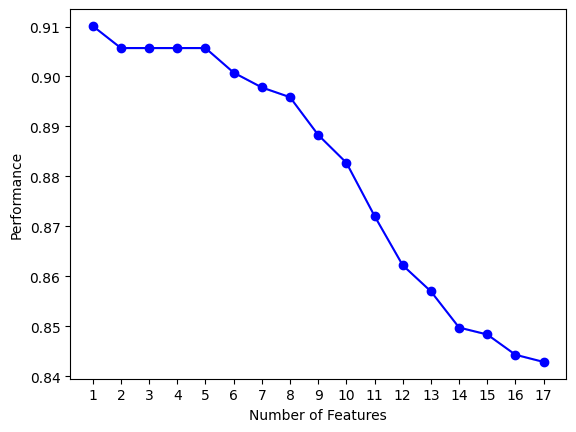

In [42]:
# Sequential forward selection
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1)
sfs = SFS(lr,
           k_features=17, # number of features to select
           forward=True,
           floating=False,
           scoring='f1',
           cv=0)
# Fit SFS to our features X and outcome y   
sfs.fit(x_train, y_train)

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


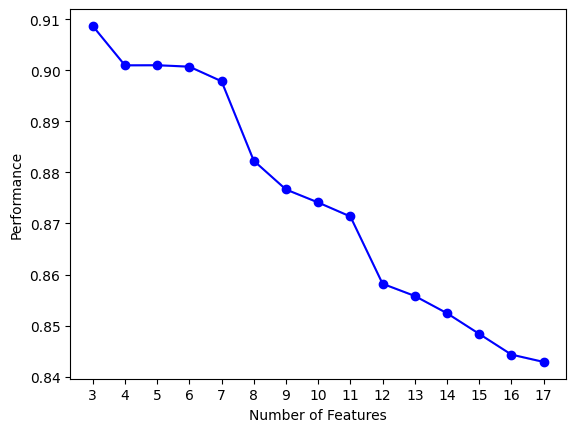

In [43]:
#Sequential Backward selection
sbs = SFS(lr,
           k_features=3, # number of features to select
           forward=False,
           floating=False,
           scoring='f1',
           cv=0)
# Fit SFS to our features X and outcome y   
sbs.fit(x_train, y_train)

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


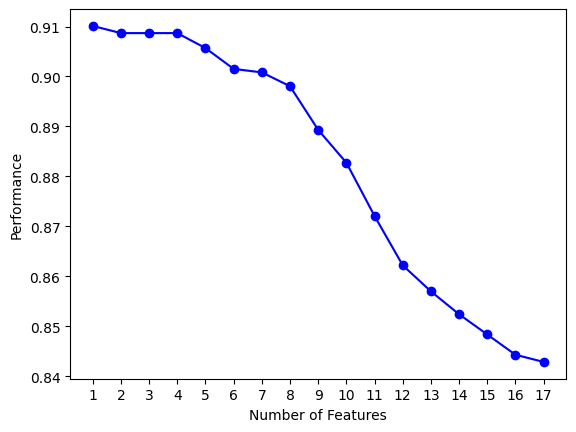

In [44]:
# Sequential forward selection with floating
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1)
sfs = SFS(lr,
           k_features=17, # number of features to select
           forward=True,
           floating=True,
           scoring='f1',
           cv=0)
# Fit SFS to our features X and outcome y   
sfs.fit(x_train, y_train)

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

In [45]:
#Recursive feature elimination
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(x_train, y_train)

rfe_features = [f for (f, support) in zip(x_train.columns, rfe.support_) if support]
print(rfe_features)
print(rfe.score(x_train, y_train))

['orientation', 'status', 'kids', 'likes_pets', 'age_normalized']
0.7833284925936683


In [46]:
feature_list = []
scores = []
for k in range(1, 15):
    rfe = RFE(lr, n_features_to_select=k)
    rfe.fit(x_train, y_train)

    rfe_features = [f for (f, support) in zip(x_train.columns, rfe.support_) if support]
    feature_list.append(rfe_features)
    scores.append(rfe.score(x_train, y_train))

In [47]:
print('Best score: ', max(scores))
print('Best features: ', feature_list[np.argmax(scores)])

Best score:  0.7873947139122858
Best features:  ['orientation', 'status', 'kids', 'likes_pets', 'age_normalized', 'height_normalized']


Conclusions: 
- All methods showed that the best number of features is 4-6
- Recursive feature elimination pointed to the following features as best to use
    - orientation
    - status
    - kids
    - likes_pets
    - age
    - height

In [48]:
# create X_wrapper that contains only columns selected with wrapper methods
selected_columns = ['orientation', 'status', 'kids', 'likes_pets', 'age_normalized', 'height_normalized']
X_wrapper = X_enc[selected_columns]
X_wrapper.columns

Index(['orientation', 'status', 'kids', 'likes_pets', 'age_normalized',
       'height_normalized'],
      dtype='object')

# PCA for dimensionality reduction

In [49]:
# fit PCA
pca = PCA()
components = pca.fit(X_enc).components_                 #get principal components
components = pd.DataFrame(components).transpose()       #create df that is readable
components.index =  X_enc.columns                       #get column names from original df
components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
body_type,-0.011944,0.104556,-0.007550,0.991791,-0.055154,-0.032631,-0.008045,0.010293,-0.019537,0.020136,-0.009370,-0.007529,0.000989,0.002964,0.000184,0.000599,0.000213
drinks,-0.000887,-0.003307,-0.003314,-0.011067,0.021459,-0.068365,-0.985154,0.135382,0.025991,0.046490,-0.017540,-0.036652,0.036690,0.004614,0.003037,-0.000316,0.000131
drugs,-0.003344,0.020423,-0.024157,0.024105,-0.027164,0.635206,-0.153446,-0.747734,-0.056479,-0.081245,-0.013019,0.031494,0.011028,0.020029,-0.000601,0.007160,-0.001831
job,0.999308,-0.016965,-0.027465,0.012899,-0.010751,-0.003156,-0.001600,-0.005563,-0.000414,0.001359,-0.002125,0.000701,0.000024,0.002216,-0.000039,0.002026,0.000025
orientation,-0.000965,-0.002165,0.001822,-0.005789,0.006794,-0.066203,-0.031155,0.044865,-0.492798,-0.191838,-0.375095,0.753019,0.040843,-0.057766,0.002529,-0.011969,-0.002097
sex,-0.000892,0.007989,0.004435,-0.029516,-0.005074,0.044202,0.033257,-0.007854,-0.551697,0.659250,-0.338494,-0.357102,0.034400,0.016664,0.003802,-0.001918,-0.115492
smokes,0.005684,0.004037,0.011024,0.016167,-0.051724,0.760044,0.031610,0.644929,-0.007016,-0.019293,0.025209,0.033554,-0.002792,-0.001257,-0.001235,0.009965,-0.000528
status,0.001293,-0.007599,0.004241,-0.001529,0.004637,-0.049934,-0.018375,0.054384,-0.559457,-0.659062,0.125256,-0.476107,0.016909,0.063975,0.002530,0.000944,0.001502
first_ethnicity,-0.026250,0.076013,-0.994552,-0.019659,-0.055578,-0.010933,0.006312,0.025227,-0.006185,0.001594,0.005526,-0.000696,0.003620,-0.003647,0.001401,-0.003345,-0.004092
education_binned,0.008893,0.011158,-0.056349,0.055665,0.994756,0.057135,0.019320,0.011785,0.004369,0.000728,-0.010944,-0.005610,-0.002050,0.000276,-0.000440,-0.005576,-0.000542


In [50]:
# get proportional sizes of PC
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.475262,0.161389,0.14615,0.100655,0.060003,0.018179,0.012055,0.01037,0.003978,0.003449,0.00276,0.002554,0.001793,0.001116,0.000146,0.000091,0.00005


Looks like the first 5 PC explains the 94.2% of data.

In [51]:
#Take the first 5 PC and use it to obtain train and test data
pca = PCA(n_components = 5)
X_pc = pca.fit_transform(X_enc)
X_pc = pd.DataFrame(X_pc)            #transform array into df
X_pc.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']    #name columns in df

#data_pc and y have different indeces: reset index in y
y_pc = y.reset_index().drop(columns=['index'])

print(y_pc)
print(X_pc.shape)
X_pc.head()

      want_kids
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
...         ...
9833        1.0
9834        0.0
9835        1.0
9836        1.0
9837        1.0

[9838 rows x 1 columns]
(9838, 5)


,PC1,PC2,PC3,PC4,PC5
0,9.420954,3.666200,5.971424,-3.519101,-0.999009
1,-1.758049,4.799058,-2.174261,-1.366270,5.454941
2,-6.833247,3.770873,-1.683772,-1.784451,-1.371805
3,-9.886775,0.816646,-1.808675,-1.507878,-1.291796
4,2.186080,1.987949,3.840783,6.597582,-1.543395


# Model

Now we have two set of data:
- X_wrapper and y where columns in X have been selected with wrapper methods
- X_pc and y_pc where columns in X are the principal components.

I am going to use both data to test it on different classifiers to see which is the best one.

## Logistic Regression

In [52]:
def model_feature_selection(X, y, model, model_name, features_selection_method_name):
    # split train and test data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 1)
    
    # fit model
    model = model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #scores
    print(model_name, features_selection_method_name, 'f1 score: ', f1_score(y_test, y_pred))

In [53]:
model_feature_selection(X_enc, y, LogisticRegression(max_iter=1000, class_weight='balanced'), 'Logistic Regression', 'no feature selection')
model_feature_selection(X_wrapper, y, LogisticRegression(max_iter=1000, class_weight='balanced'), 'Logistic Regression', 'wrapper methods')
model_feature_selection(X_pc, np.ravel(y_pc), LogisticRegression(max_iter=1000, class_weight='balanced'), 'Logistic Regression', 'PCA dimensionality reduction')

Logistic Regression no feature selection f1 score:  0.8432949358835036
Logistic Regression wrapper methods f1 score:  0.8765638031693078
Logistic Regression PCA dimensionality reduction f1 score:  0.6803720019579049


## KNN

In [54]:
model_feature_selection(X_enc, y, KNeighborsClassifier(n_neighbors=3), 'KNN', 'no feature selection')
model_feature_selection(X_wrapper, y, KNeighborsClassifier(n_neighbors=3), 'KNN', 'wrapper methods')
model_feature_selection(X_pc, np.ravel(y_pc), KNeighborsClassifier(n_neighbors=3), 'KNN', 'PCA dimensionality reduction')

KNN no feature selection f1 score:  0.9014404852160728
KNN wrapper methods f1 score:  0.9076773566569485
KNN PCA dimensionality reduction f1 score:  0.8872266973532796


## Decision Tree

In [55]:
model_feature_selection(X_enc, y, DecisionTreeClassifier(max_depth=5), 'Decision Tree Classifier', 'no feature selection')
model_feature_selection(X_wrapper, y, DecisionTreeClassifier(max_depth=5), 'Decision Tree Classifier', 'wrapper methods')
model_feature_selection(X_pc, np.ravel(y_pc), DecisionTreeClassifier(max_depth=5), 'Decision Tree Classifier', 'PCA dimensionality reduction')

Decision Tree Classifier no feature selection f1 score:  0.9194528875379939
Decision Tree Classifier wrapper methods f1 score:  0.9265515278041373
Decision Tree Classifier PCA dimensionality reduction f1 score:  0.9109715552271888


## Conclusions

Logistic Regression model, f1 score:
- No feature selection: 0.843
- Features selected with wrapper methods: **0.876**
- PCA dimensionality reduction: 0.68

KNN model, f1 score:
- No feature selection: 0.902
- Features selected with wrapper methods: **0.908**
- PCA dimensionality reduction: 0.888

Score is higher, but I should test for different n_neighbors as well.

Decision Tree model, f1 score:
- No feature selection: 0.92
- Features selected with wrapper methods: **0.927**
- PCA dimensionality reduction: 0.911

So in conclusion, the wrapper method is the best feature selection method that give the highest score. The Decision Tree classifier is the best model, compared to Logistic Regression and KNN.

It would be interesting in the future to tune the hyperparamenters of the model to see if it's possible to increase the score even further.